C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_9948\3469189751.py:10: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



    Year  CPI (Index)  Inflation Rate (%)
42  2012       646.62                4.17
43  2013       698.74                8.06
44  2014       763.64                9.29
45  2015       798.29                4.54
46  2016       840.53                5.29
47  2017       906.69                7.87
48  2018       948.11                4.57
49  2019      1024.52                8.06
50  2020      1092.85                6.67
51  2021      1179.45                7.92
52  2022      1260.71                6.89


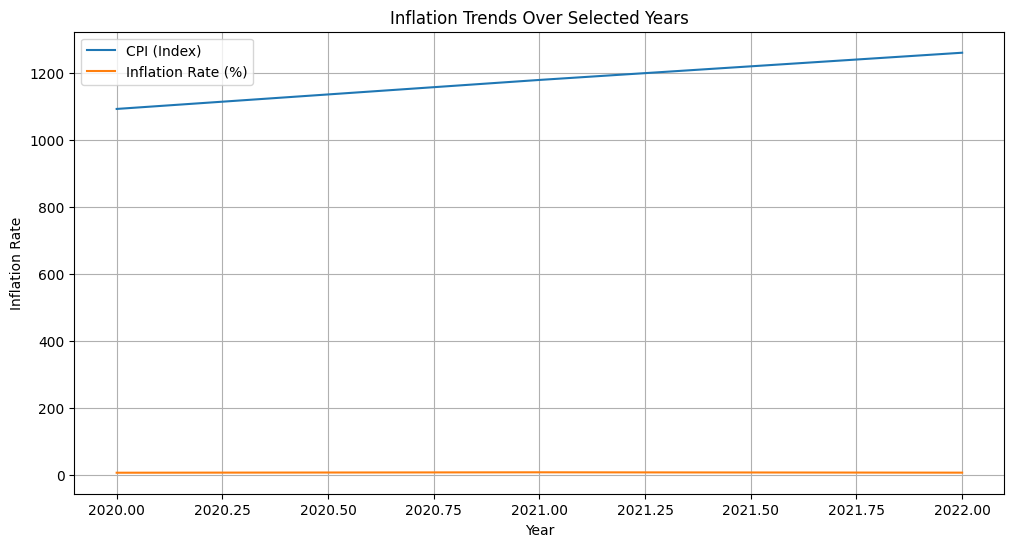

ValueError: invalid literal for int() with base 10: ''

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.fillna(method='ffill', inplace=True)  # Forward fill missing values
    df["Year"] = df["Year"].astype(int)
    return df

def get_inflation_data(df, start_year=None, end_year=None):
    if start_year and end_year:
        return df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    return df

def train_inflation_model(df):
    X = df[["Year"]]
    y = df.drop(columns=["Year"])
    models = {}
    for col in y.columns:
        model = LinearRegression()
        model.fit(X, y[col])
        models[col] = model
    return models

def predict_inflation(models, start_year, end_year):
    future_years = np.array(range(start_year, end_year + 1)).reshape(-1, 1)
    predictions = {col: models[col].predict(future_years) for col in models.keys()}
    
    pred_df = pd.DataFrame(predictions)
    pred_df.insert(0, "Year", future_years.flatten())
    file_name = f"Inflation_Prediction_{start_year}_to_{end_year}.csv"
    pred_df.to_csv(file_name, index=False)
    
    return pred_df, file_name

def visualize_inflation(df, start_year, end_year):
    df_filtered = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    plt.figure(figsize=(12, 6))
    for col in df_filtered.columns[1:]:
        plt.plot(df_filtered["Year"], df_filtered[col], label=col)
    plt.xlabel("Year")
    plt.ylabel("Inflation Rate")
    plt.title("Inflation Trends Over Selected Years")
    plt.legend()
    plt.grid()
    plt.show()
    
    fig = px.line(df_filtered, x="Year", y=df_filtered.columns[1:], title="Interactive Inflation Trends")
    fig.show()

# Load dataset
df = load_and_preprocess_data(r"D:\Finsight-Bharat\CPI_Inflation_India_1970_2024.csv")

# User Inputs
view_start = int(input("Enter start year to view inflation data: "))
view_end = int(input("Enter end year to view inflation data: "))
print(get_inflation_data(df, view_start, view_end))

viz_start = int(input("Enter start year for visualization: "))
viz_end = int(input("Enter end year for visualization: "))
visualize_inflation(df, viz_start, viz_end)

pred_start = int(input("Enter start year for prediction: "))
pred_end = int(input("Enter end year for prediction: "))
models = train_inflation_model(df)
pred_df, report_file = predict_inflation(models, pred_start, pred_end)
print(f"Download your report: {report_file}")


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import plotly.express as px

def load_and_preprocess_data(file_path):
    df = pd.read_csv(file_path)
    df.rename(columns=lambda x: x.strip(), inplace=True)  # Ensure no trailing spaces
    if "Inflation Rate (%)" not in df.columns:
        raise KeyError("Column 'Inflation Rate (%)' not found in dataset. Check column names.")
    df["Year"] = df["Year"].astype(int)
    df["Inflation Rate (%)"] = pd.to_numeric(df["Inflation Rate (%)"], errors='coerce')
    df.ffill(inplace=True)
    df.bfill(inplace=True)
    return df

def train_model(df):
    X = df[["Year"]]
    y = df["Inflation Rate (%)"]
    model = LinearRegression()
    model.fit(X, y)
    return model

def get_inflation_data(df, start_year, end_year):
    return df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]

def predict_inflation(model, start_year, end_year):
    future_years = np.array(range(start_year, end_year + 1)).reshape(-1, 1)
    predictions = model.predict(future_years)
    report_df = pd.DataFrame({"Year": future_years.flatten(), "Predicted Inflation Rate (%)": predictions})
    file_name = f"Inflation_Prediction_Report_{start_year}_to_{end_year}.csv"
    report_df.to_csv(file_name, index=False)
    return future_years.flatten(), predictions, file_name

def visualize_inflation(df, start_year, end_year):
    filtered_data = df[(df["Year"] >= start_year) & (df["Year"] <= end_year)]
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=filtered_data["Year"], y=filtered_data["Inflation Rate (%)"], marker="o", label="Historical Inflation")
    plt.xlabel("Year")
    plt.ylabel("Inflation Rate (%)")
    plt.title(f"Inflation Rate Trend ({start_year}-{end_year})")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    fig = px.line(filtered_data, x="Year", y="Inflation Rate (%)", title=f"Inflation Trend ({start_year}-{end_year})",
                  labels={"Year": "Year", "Inflation Rate (%)": "Inflation Rate (%)"}, markers=True)
    return fig

def process_user_request(action, start_year, end_year):
    if action == "historical_data":
        data = get_inflation_data(df, start_year, end_year)
        visualization = visualize_inflation(df, start_year, end_year)
        return {"data": data, "visualization": visualization}
    elif action == "predict":
        future_years, predictions, report_file = predict_inflation(model, start_year, end_year)
        return {"predictions": predictions, "report_file": report_file}
    else:
        return {"error": "Invalid action specified."}

file_path = "CPI_Inflation_India_1970_2024.csv"
df = load_and_preprocess_data(file_path)
model = train_model(df)



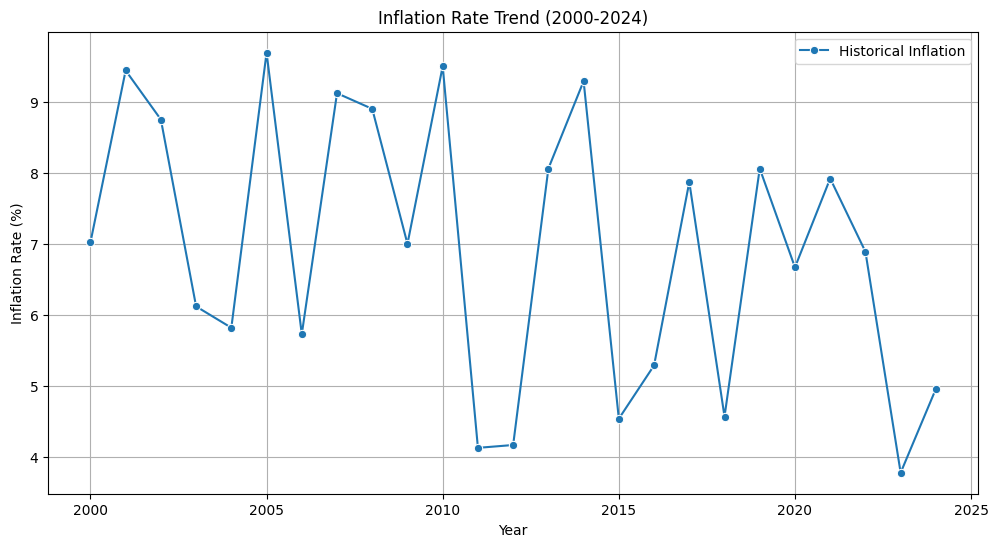

    Year  CPI (Index)  Inflation Rate (%)
30  2000       276.22                7.02
31  2001       302.28                9.44
32  2002       328.73                8.75
33  2003       348.85                6.12
34  2004       369.16                5.82
35  2005       404.95                9.69
36  2006       428.17                5.73
37  2007       467.23                9.12
38  2008       508.80                8.90
39  2009       544.41                7.00
40  2010       596.11                9.50
41  2011       620.74                4.13
42  2012       646.62                4.17
43  2013       698.74                8.06
44  2014       763.64                9.29
45  2015       798.29                4.54
46  2016       840.53                5.29
47  2017       906.69                7.87
48  2018       948.11                4.57
49  2019      1024.52                8.06
50  2020      1092.85                6.67
51  2021      1179.45                7.92
52  2022      1260.71             

In [15]:
# Example Usage
action = "historical_data"  # or "predict"
start_year = 2000
end_year = 2024

result = process_user_request(action, start_year, end_year)

if "data" in result:
    print(result["data"])
    result["visualization"].show()

if "predictions" in result:
    print("Predicted Inflation Rates:", result["predictions"])
    print("Report generated:", result["report_file"])
